In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import operator
import time

In [6]:
train_csv = pd.read_csv('dataset/train.csv')

In [7]:
train_csv.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


Additional Column in test for id, replaceing the  price range

In [8]:
train_csv.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
train_csv.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Take all test as features. Train into class (last column) and the rest as features

In [10]:
train_np_data= np.array(train_csv.values.tolist())

In [11]:
train_features = train_np_data[:,:-1]
train_class = train_np_data[:,-1]

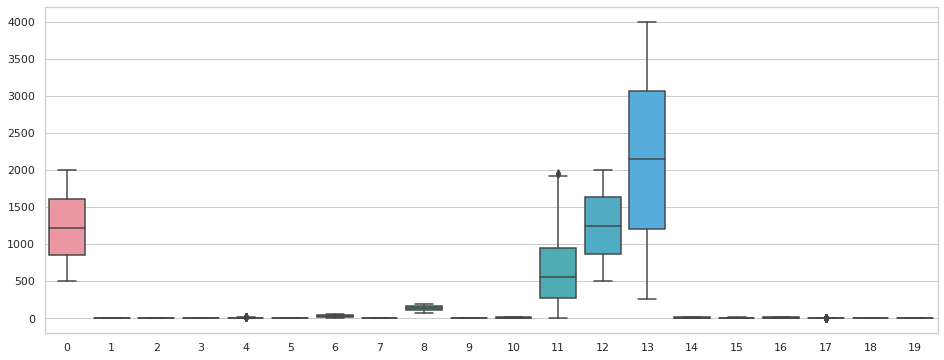

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=train_features)

Scaling Data

In [13]:
scaler = MinMaxScaler()
scaler.fit(train_features)
print("Pre-scaled Data : {}".format(train_features))
train_features_scaled =  scaler.transform(train_features)
print("Scaled Data : {}".format(train_features_scaled))

Pre-scaled Data : [[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]
Scaled Data : [[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [14]:
import main

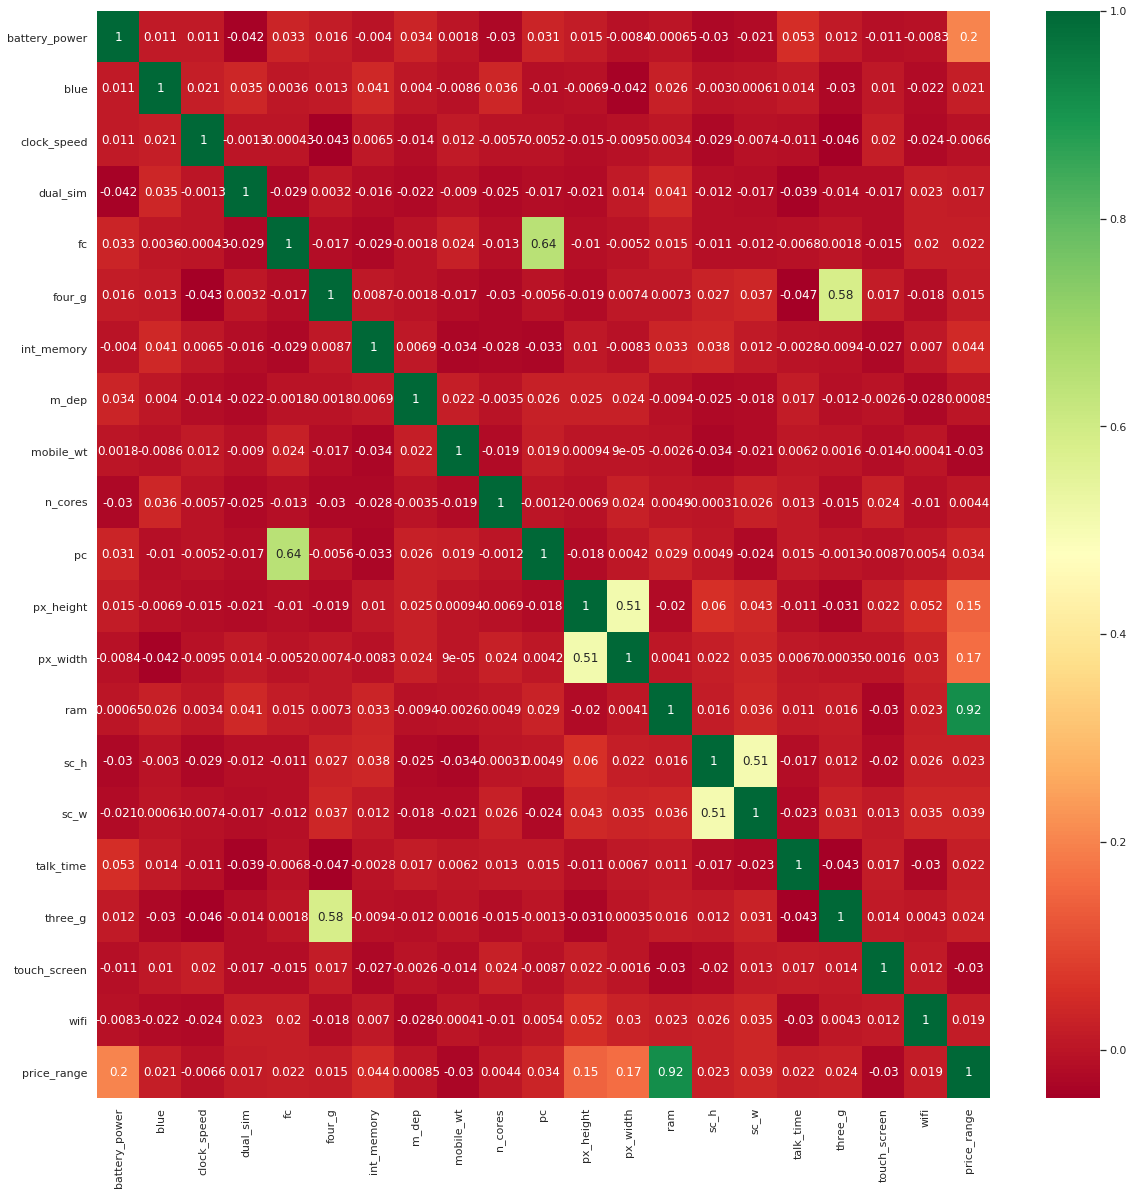

In [15]:
def correlation_matrix(dataset):
    # Develop a correlation between the various features
    correlation_mat = dataset.corr()
    correlation_features = correlation_mat.index
    plt.figure(figsize=(20, 20))
    # Plotting the heatmap
    sns.heatmap(dataset[correlation_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()
correlation_matrix(train_csv)

## Dim Reduction Trial

In [16]:
clf= DecisionTreeClassifier()
scores = cross_val_score(clf,train_features_scaled,train_class,cv=10)
print("Original Accuracy is ",np.mean(scores))

Original Accuracy is  0.8314999999999999


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(train_features_scaled) 
pca_train_features_scaled = pca.transform(train_features_scaled)
print ("Explained Variance: ",np.sum(pca.explained_variance_ratio_))

Explained Variance:  0.23218712393082325


In [18]:
clf= DecisionTreeClassifier()
scores = cross_val_score(clf,pca_train_features_scaled,train_class,cv=10)
print("After DIM Reduction/PCA Accuracy is ",np.mean(scores))

After DIM Reduction/PCA Accuracy is  0.24949999999999997


## Graphs of feature selection/removal and accuracies with different models

In [36]:
from sklearn.feature_selection import SelectFromModel

selector  = SelectFromModel(SVC(kernel='linear', C=10, gamma="auto", decision_function_shape="ovo", random_state=42), max_features=20)
selector .fit(train_features_scaled, train_class)
train_copy = train_csv.copy()
train_copy = train_copy.drop(["price_range"],axis=1)
selector_support =  selector .get_support()
selector_feature = train_copy.loc[:,selector_support].columns.tolist()
print((len(selector_feature)), 'selected features')

4 selected features


In [35]:
dwop = train_csv.drop(["price_range"],axis=1)
dwop
train_csv

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
